Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as stats

Data loading

In [2]:
# Load dataframe
df = pd.read_csv("Exp67_4plates_controls.csv")

# Columns
df_columns = df.columns.to_list()

Plot settings

In [9]:
# Plotting parameters
data = df
x = 'tags'
y = "Cell_TH_SNCA_Intensity_SumIntensityPerNuclei_SNCA" # Cell_Neurites_Length_MAP2, Nuclei_Ratio_Living, Cell_Intensity_MeanIntensity_TH, Cell_TH_SNCA_Intensity_SumIntensityPerNuclei_SNCA
y_label = y
replicate = "Plate"
order = ["WT - DMSO", "Mut - DMSO", "Mut - PRO"]

# Color palette as dictionary
palette = {
    "WT - DMSO":'#4C72B0', # blue
    "Mut - DMSO":'#C44E52', # red 
    "Mut - PRO":'orange'
    }

# Change the global font to Arial
plt.rcParams['font.family'] = 'Arial'

# Plot style
ax = sns.set_context("talk")

Plotting

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
c:\Users\JohannesWilbertz\anaconda3\envs\tools\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
c:\Users\JohannesWilbertz\anaconda3\envs\tools\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WT - DMSO vs. Mut - DMSO: Welch's t-test independent samples, P_val:6.354e-02 t=-2.313e+00
Mut - DMSO vs. Mut - PRO: Welch's t-test independent samples, P_val:9.930e-03 t=-3.778e+00
WT - DMSO vs. Mut - PRO: Welch's t-test independent samples, P_val:2.680e-03 t=-5.567e+00


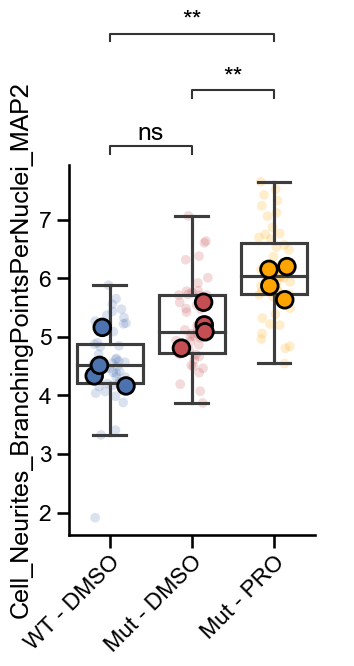

In [10]:
# Boxplot
ax = sns.boxplot(x=x, y=y, data=data, width=0.8, 
                  showfliers=False, order=order,
                  zorder=1)  
# Transparancy of boxplot filling color
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))

ax = sns.stripplot(x=x, y=y, data=df, size=7, alpha=0.2, 
                    zorder=0, order=order, jitter=0.2, 
                    palette=palette, dodge=True)

# Add replicate averages on top of plot
ReplicateAverages = df.groupby([x, replicate], as_index=False).agg({y: "median"})
ReplicateAverages = ReplicateAverages.sort_values([x, replicate]) # Sorting is necessary to plot averages accurately on dataclouds

ax = sns.stripplot(x=x, y=y, size=12, edgecolor="k", linewidth=2, palette=palette, 
                   data=ReplicateAverages, order=order, jitter=0.2, 
                   dodge=True)

#Figure aesthetics
ax.set(xlabel=None)
ax.set(ylabel=y_label)
sns.despine()
ax.legend()
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor")
ax.set_box_aspect(1.5)
#ax.set(ylim=(0, 0.8))

# Add statistical annotation on top of figure
pairs=[
    ("WT - DMSO", "Mut - DMSO"),
    ("WT - DMSO", "Mut - PRO"),
    ("Mut - DMSO", "Mut - PRO")
    ]

annot = Annotator(ax, pairs, data=ReplicateAverages, x=x, y=y, order=order)
annot.configure(test='t-test_welch', verbose=2, loc='outside') # t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
annot.apply_test()
annot.annotate()

# Saving plot
plt.savefig(y + '.pdf', bbox_inches='tight')

plt.show()

Phenotypic profile

C:\Users\JohannesWilbertz\AppData\Local\Temp\ipykernel_39784\4136810083.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_median = df_scaled.groupby('tags').median()


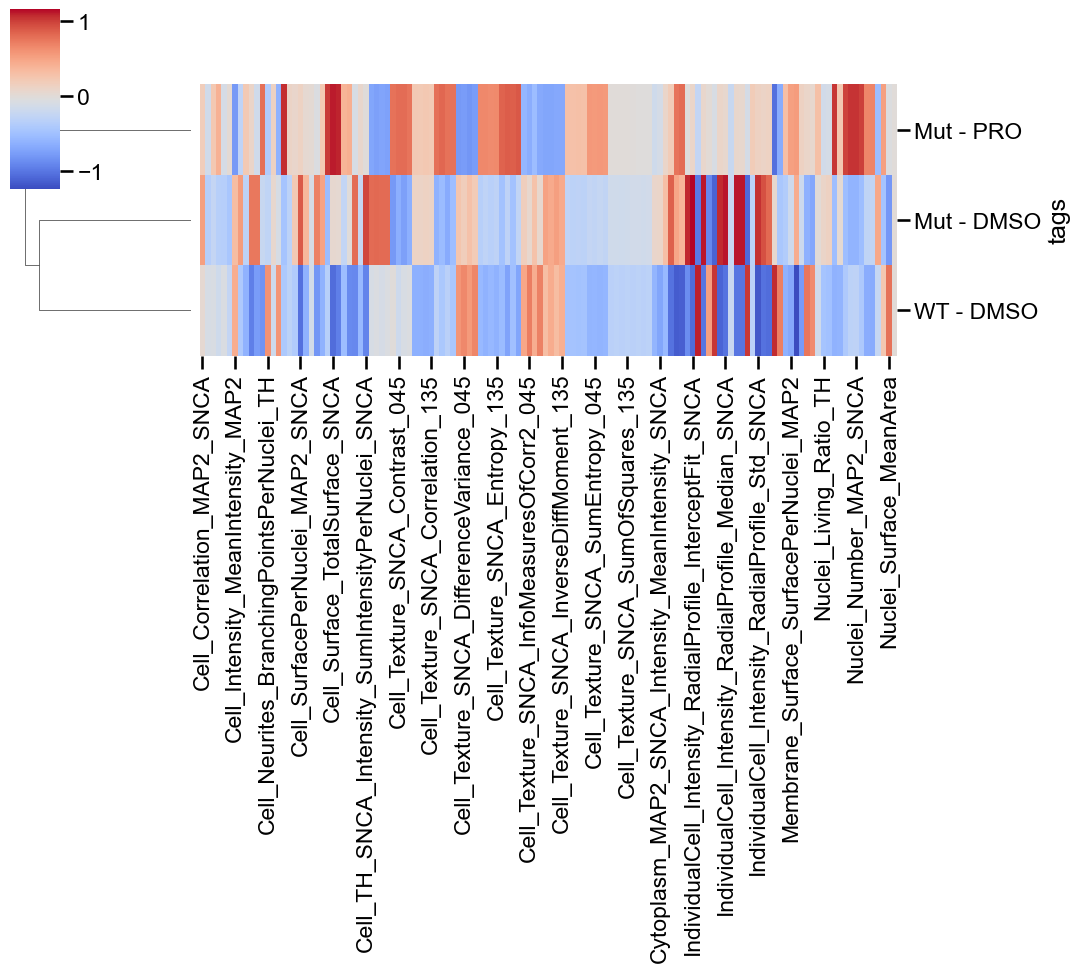

In [5]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Sort numerical columns alphabetically
numerical_cols.sort()

# Standard scale the numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols, index=df.index)

# Add the 'tags' column back to the scaled dataframe
df_scaled[['tags', 'Plate']] = df[['tags', 'Plate']]

# Compute median values for each category in 'tags' column
df_median = df_scaled.groupby('tags').median()

# Create clustermap with row clusters and cosine distance metric
g = sns.clustermap(df_median, metric='cosine', cmap='coolwarm', col_cluster=False)
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)

# Saving plot
plt.savefig('PhenotypicProfile' + '.pdf', bbox_inches='tight')

plt.show()


Distinguishing features

C:\Users\JohannesWilbertz\AppData\Local\Temp\ipykernel_39784\3417964013.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  abs_diff_means_wt = abs_diff_means_wt.append((df_mut_dmso_plate - df_wt_dmso_plate).abs(), ignore_index=True)
C:\Users\JohannesWilbertz\AppData\Local\Temp\ipykernel_39784\3417964013.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  abs_diff_means_prostratin = abs_diff_means_prostratin.append((df_mut_dmso_plate - df_mut_prostratin_plate).abs(), ignore_index=True)
C:\Users\JohannesWilbertz\AppData\Local\Temp\ipykernel_39784\3417964013.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  abs_diff_means_wt = abs_diff_means_wt.append((df_mut_dmso_plate - df_wt_dmso_plate).abs(), ignore_index=True)
C:\Us

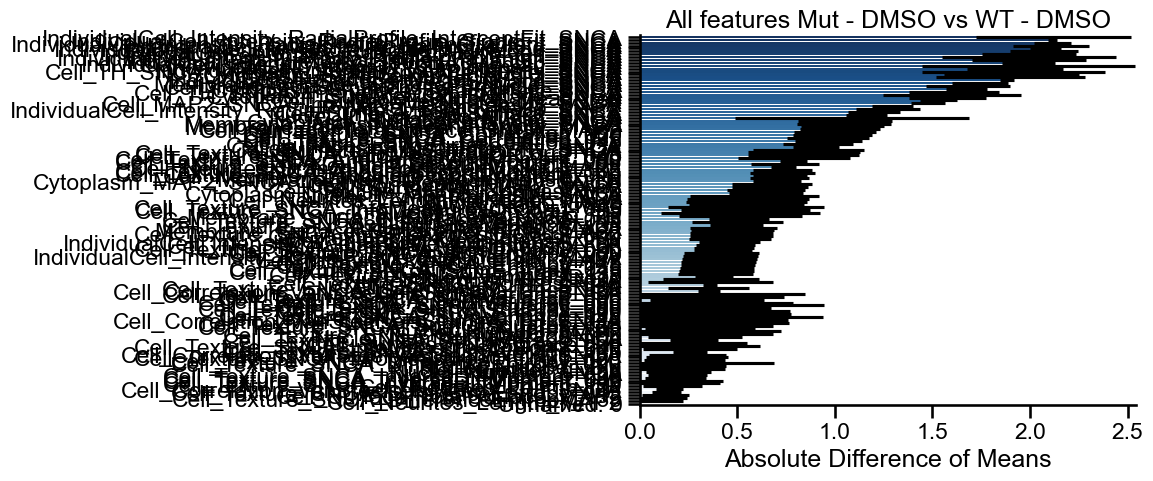

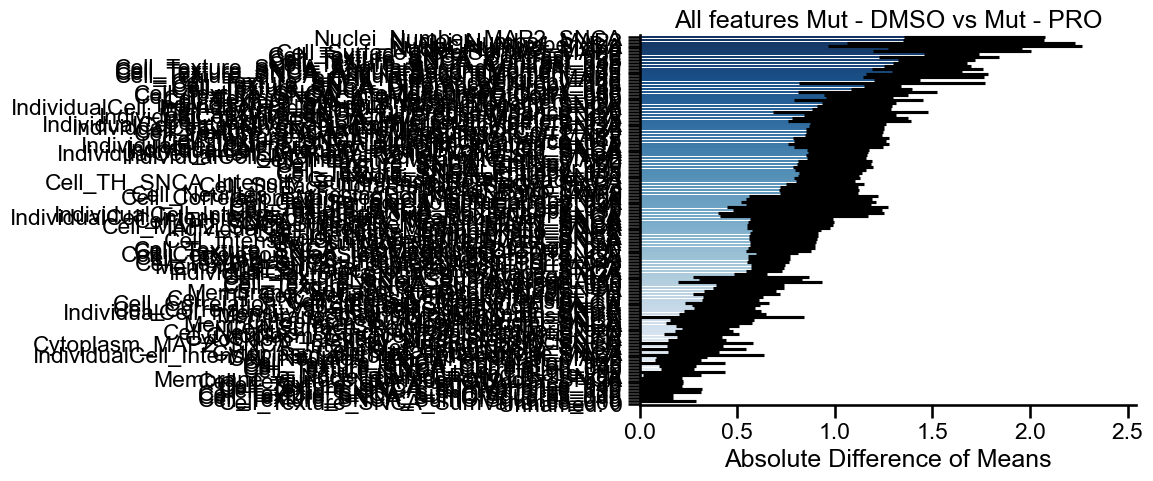

In [6]:
# Group across experimental replicates and treatments
grouped = df_scaled.groupby(['Plate', 'tags'])

# Initialize empty dataframes to store the absolute differences
abs_diff_means_wt = pd.DataFrame()
abs_diff_means_prostratin = pd.DataFrame()

# Iterate over each plate
for plate in df_scaled['Plate'].unique():
    # Select data for current plate
    df_mut_dmso_plate = grouped.mean().loc[(plate, 'Mut - DMSO'), :]
    df_wt_dmso_plate = grouped.mean().loc[(plate, 'WT - DMSO'), :]
    df_mut_prostratin_plate = grouped.mean().loc[(plate, 'Mut - PRO'), :]

    # Calculate absolute differences and append to respective dataframe
    abs_diff_means_wt = abs_diff_means_wt.append((df_mut_dmso_plate - df_wt_dmso_plate).abs(), ignore_index=True)
    abs_diff_means_prostratin = abs_diff_means_prostratin.append((df_mut_dmso_plate - df_mut_prostratin_plate).abs(), ignore_index=True)

# Calculate mean and std of absolute differences
mean_abs_diff_wt = abs_diff_means_wt.mean()
std_abs_diff_wt = abs_diff_means_wt.std()

mean_abs_diff_prostratin = abs_diff_means_prostratin.mean()
std_abs_diff_prostratin = abs_diff_means_prostratin.std()

# Get top features with largest differences
top_features_wt = mean_abs_diff_wt.nlargest(130)
top_features_prostratin = mean_abs_diff_prostratin.nlargest(130)

# Barplot of the top features with error bars

# Calculate the maximum x-value from both datasets, taking into account the error bars
max_x = max((top_features_wt + std_abs_diff_wt).values.max(), (top_features_prostratin + std_abs_diff_prostratin).values.max())

# Barplot of the top features with error bars
sns.barplot(x=top_features_wt.values, y=top_features_wt.index, xerr=std_abs_diff_wt, palette='Blues_r', errwidth=0.1)
plt.title('All features Mut - DMSO vs WT - DMSO')
plt.xlabel('Absolute Difference of Means')
plt.xlim(0, max_x)  # Set the limits of x-axis
sns.despine()
plt.savefig('Feature_comp_Mut-WT_all' + '.pdf', bbox_inches='tight')
plt.show()

sns.barplot(x=top_features_prostratin.values, y=top_features_prostratin.index, xerr=std_abs_diff_prostratin, palette='Blues_r', errwidth=0.1)
plt.title('All features Mut - DMSO vs Mut - PRO')
plt.xlabel('Absolute Difference of Means')
plt.xlim(0, max_x)  # Set the limits of x-axis
sns.despine()
plt.savefig('Feature_comp_Mut-Pro_all' + '.pdf', bbox_inches='tight')
plt.show()


Perform PCA

['Mut - PRO' 'Mut - DMSO' 'WT - DMSO']


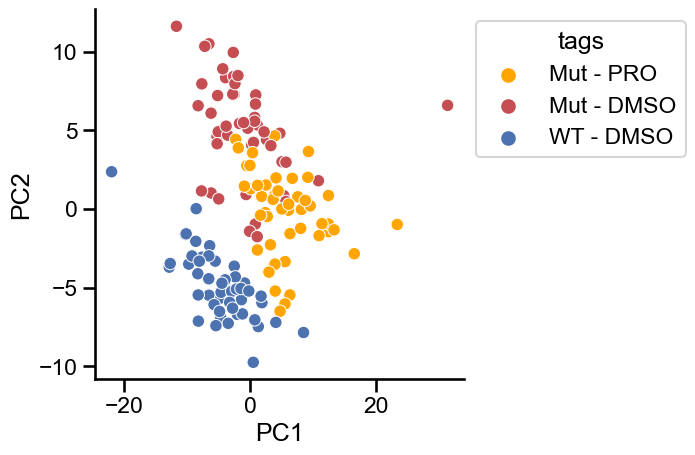

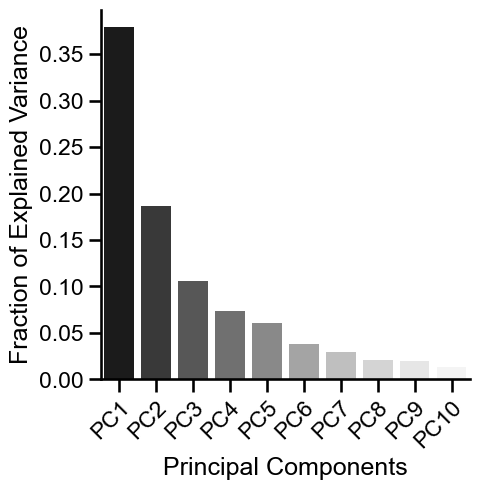

In [7]:
X = df_scaled[numerical_cols]

# Perform PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Convert to DataFrame
df_pca = pd.DataFrame(data = X_pca, columns = ['PC'+str(i) for i in range(1, 11)])

# Copy the 'tags' column to the new DataFrame
df_pca['tags'] = df_scaled['tags'].reset_index(drop=True)
print(df_pca['tags'].unique())
# Plot the first two principal components
ax = sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='tags', palette=palette)
ax.set_box_aspect(1)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine()
plt.savefig('PCA_plot' + '.pdf', bbox_inches='tight')
plt.show()

# Plot the explained variance
explained_variance = pca.explained_variance_ratio_
ax = sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance, palette="Greys_r")
ax.set_box_aspect(1)
plt.xlabel('Principal Components')
plt.ylabel('Fraction of Explained Variance')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor")
sns.despine()
plt.savefig('PC_contribution' + '.pdf', bbox_inches='tight')
plt.show()


Feature correlations with PCs

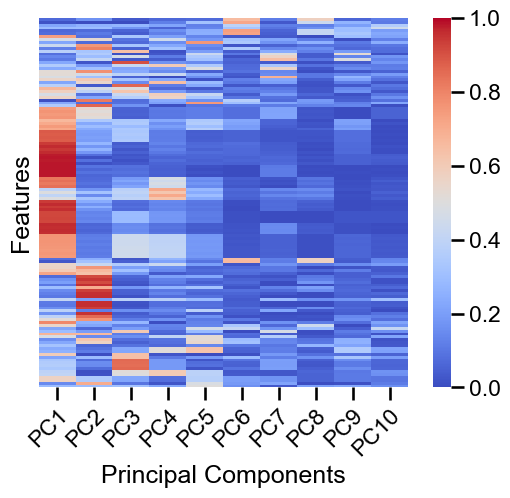

In [8]:
# Calculate the correlation between the original features and the first 10 PCs
corr = np.corrcoef(df_scaled[numerical_cols].transpose(), df_pca.iloc[:, :10].transpose())

# Create a DataFrame from the correlation matrix
corr_df = pd.DataFrame(corr[:len(numerical_cols), len(numerical_cols):])

# Take the absolute value of the correlations
corr_df = corr_df.abs()

# Plot the heatmap
ax = sns.heatmap(corr_df, cmap='coolwarm', cbar=True, yticklabels=False, xticklabels=[f'PC{i+1}' for i in range(10)], vmin=0, vmax=1)
plt.xlabel('Principal Components')
plt.ylabel('Features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode="anchor")
ax.set_box_aspect(1)
plt.savefig('PCA_feature_correlations' + '.pdf', bbox_inches='tight')
plt.show()
